In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas import DataFrame as df
from pandas import Series as se
from scipy import stats
import statsmodels.api as sm

In [22]:
df1=pd.read_excel('Data.xlsx')
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
df1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [24]:
df1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [26]:
df1.shape

(5000, 14)

In [28]:
df1=df1.set_index('ID')

In [29]:
df1.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [48]:
num_col=df1[['Age','Experience','Income','CCAvg','Mortgage']]

In [49]:
num_col.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], dtype='object')

In [53]:
char_col=df1.drop(['Age','Experience','Income','CCAvg','Mortgage'],axis=1)

In [54]:
char_col.columns

Index(['ZIP Code', 'Family', 'Education', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
for i in df1:
    print(df1[i].unique())

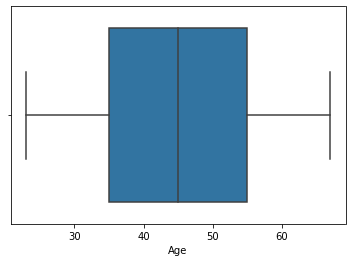

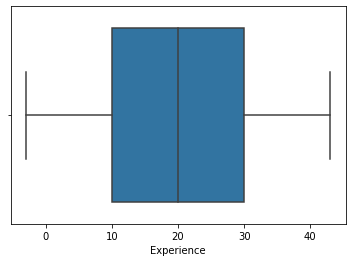

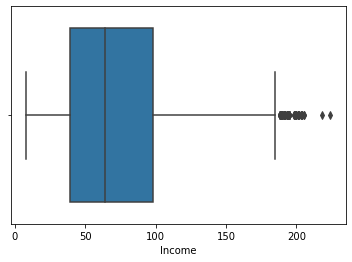

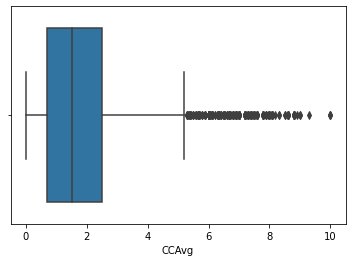

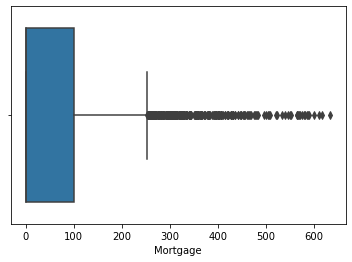

In [55]:
for i in num_col:
    sns.boxplot(df1[i])
    plt.show()

In [45]:
num_col=df1[['Age','Experience','Income','CCAvg']]
for i in num_col:
    q1=df1[i].quantile(.25)
    q3=df1[i].quantile(.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    df1[df1[i]>ul]

In [46]:
df1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


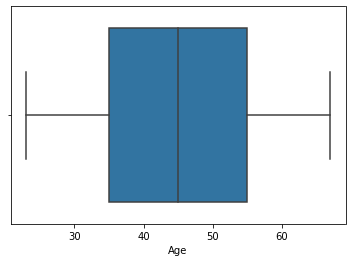

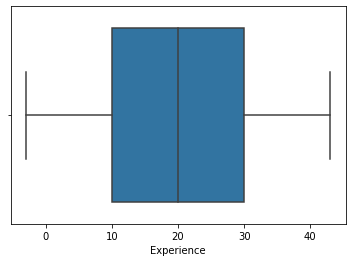

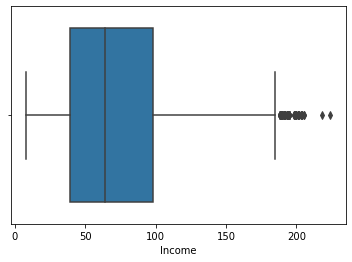

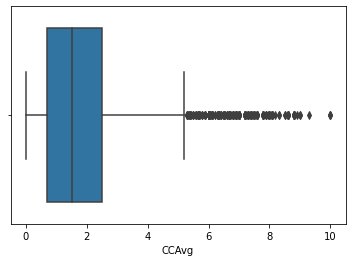

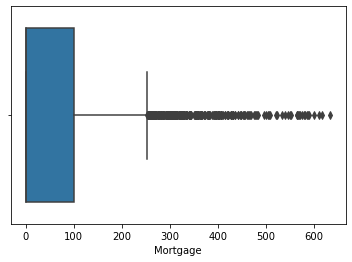

In [57]:
for i in num_col:
    sns.boxplot(df1[i])
    plt.show()

In [56]:
q1=df1['Income'].quantile(.25)
q3=df1['Income'].quantile(.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
df1[df1['Income']>ul].index

Int64Index([  19,   48,   54,   60,  304,  330,  460,  527,  678,  741,  780,
             783,  788,  915,  918,  941, 1015, 1068, 1085, 1098, 1131, 1168,
            1205, 1278, 1308, 1321, 1396, 1433, 1505, 1552, 1553, 1593, 1638,
            1667, 1705, 1712, 1717, 1720, 1784, 1786, 1825, 1902, 1913, 1936,
            2088, 2102, 2197, 2216, 2247, 2279, 2320, 2338, 2448, 2647, 2705,
            2754, 2842, 2860, 2905, 2935, 2957, 2989, 3125, 3313, 3352, 3459,
            3484, 3544, 3569, 3609, 3640, 3759, 3805, 3822, 3897, 3944, 4010,
            4021, 4043, 4123, 4157, 4226, 4268, 4283, 4293, 4310, 4485, 4564,
            4575, 4607, 4656, 4660, 4671, 4896, 4982, 4994],
           dtype='int64', name='ID')

In [58]:
q1=df1['CCAvg'].quantile(.25)
q3=df1['CCAvg'].quantile(.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
df1[df1['CCAvg']>ul].index

Int64Index([  10,   19,   45,   56,   62,   91,  132,  146,  151,  152,
            ...
            4756, 4783, 4860, 4874, 4889, 4909, 4912, 4938, 4981, 4994],
           dtype='int64', name='ID', length=324)

In [59]:
q1=df1['Mortgage'].quantile(.25)
q3=df1['Mortgage'].quantile(.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
df1[df1['Mortgage']>ul].index

Int64Index([  23,   40,   43,   60,   67,  113,  120,  131,  188,  210,
            ...
            4766, 4813, 4843, 4845, 4848, 4860, 4866, 4900, 4943, 4964],
           dtype='int64', name='ID', length=291)

In [60]:
df1['Income']=np.sqrt(df1['Income'])

In [ ]:
sns.boxplot(df1['Income'])
plt.show()

In [62]:
df1['CCAvg']=np.sqrt(df1['CCAvg'])
df1['Mortgage']=np.sqrt(df1['Mortgage'])

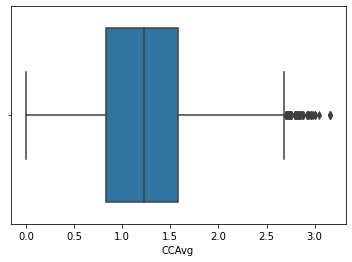

In [63]:
sns.boxplot(df1['CCAvg'])
plt.show()

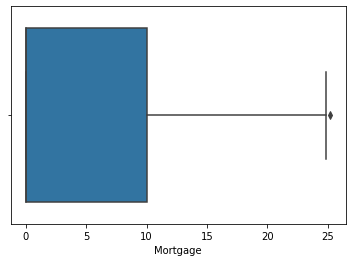

In [64]:
sns.boxplot(df1['Mortgage'])
plt.show()

In [68]:
df1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [69]:
y=df1['Personal Loan']
X=df1.drop('Personal Loan',axis=1)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [72]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('X_test',y_test.shape)


X_train (3500, 12)
y_train (3500,)
X_test (1500, 12)
X_test (1500,)


In [73]:
from scipy.stats import ttest_ind

In [74]:
ttest_ind(X_train,X_test)

Ttest_indResult(statistic=array([-2.36857646, -2.43416337, -0.21318651,  0.1921469 , -1.08637596,
       -0.42349718,  0.31230107,  0.39067161, -0.34307985, -0.05180702,
        0.20127765,  0.94822097]), pvalue=array([0.01789451, 0.01496104, 0.83119018, 0.84763494, 0.27736509,
       0.67195078, 0.75482475, 0.69605663, 0.73155282, 0.95868453,
       0.84048967, 0.34306282]))

In [75]:
ttest_ind(X_test,y_test)

Ttest_indResult(statistic=array([ 1.55481294e+02,  6.98096980e+01,  1.14729898e+02,  2.08535000e+03,
        7.57492251e+01,  6.62361729e+01,  7.63211445e+01,  2.41427093e+01,
        1.78114551e-01, -4.38833798e+00,  3.27896475e+01,  1.27803981e+01]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.91858289e-118,
       8.58645049e-001, 1.18162887e-005, 8.61974933e-202, 1.85450363e-036]))

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report
lor=LogisticRegression(solver='liblinear')

In [90]:
lor.fit(X_train,y_train)
y_train_pred=lor.predict(X_train)
y_train_prob=lor.predict_proba(X_train)[:,1]

print('train_confusion_mtrix',confusion_matrix(y_train,y_train_pred))
print('train_accuracy_score',accuracy_score(y_train,y_train_pred))
print('roc_auc_score',roc_auc_score(y_train,y_train_prob))
print('train_classification_report',classification_report(y_train,y_train_pred))

print('\n')
y_test_pred=lor.predict(X_test)
y_test_prob=lor.predict_proba(X_test)[:,1]

print('test_confusion_mtrix',confusion_matrix(y_test,y_test_pred))
print('test_accuracy_score',accuracy_score(y_test,y_test_pred))
print('roc_auc_score',roc_auc_score(y_test,y_test_prob))
print('train_classification_report',classification_report(y_train,y_train_pred))

train_confusion_mtrix [[3176    1]
 [ 323    0]]
train_accuracy_score 0.9074285714285715
roc_auc_score 0.8325386314756507
train_classification_report               precision    recall  f1-score   support

           0       0.91      1.00      0.95      3177
           1       0.00      0.00      0.00       323

    accuracy                           0.91      3500
   macro avg       0.45      0.50      0.48      3500
weighted avg       0.82      0.91      0.86      3500



test_confusion_mtrix [[1343    0]
 [ 157    0]]
test_accuracy_score 0.8953333333333333
roc_auc_score 0.8206885430944126
train_classification_report               precision    recall  f1-score   support

           0       0.91      1.00      0.95      3177
           1       0.00      0.00      0.00       323

    accuracy                           0.91      3500
   macro avg       0.45      0.50      0.48      3500
weighted avg       0.82      0.91      0.86      3500



In [104]:
y=df1['Personal Loan']
X=df1.drop('Personal Loan',axis=1)

In [105]:
Xc=sm.add_constant(X)
model=sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.120720
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                  0.6182
Time:                        12:15:19   Log-Likelihood:                -603.60
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -19.3224      4.359     -4.433      0.000     -27.865     -10.779
Age                   -0.0478      0.064     -0.753      0.452      -0.172       0.077
Experience             0.0589      0.063      0.932      0.351      -0.065       0.183
Income                 1.2244      0.061     20.163      0.000       1.105       1.343
ZIP Code            -3.86e-06   4.25e-05     -0.091      0.928   -8.72e-05    7.95e-05
Family                 0.7154      0.076      9.412      0.000       0.566       0.864
CCAvg                  0.5388      0.133      4.065      0.000       0.279       0.799
Education              1.7942      0.118     15.205      0.000       1.563       2.025
Mortgage               0.0115      0.010      1.148      0.251      -0.008       0.031
Securities Account    -0.9660      0.295     -3.276      0.001      -1.544      -0.388
CD Account             3.8556      0.336     11.492      0.000       3.198       4.513
Online                -0.6909      0.161     -4.301      0.000      -1.006      -0.376
CreditCard            -1.1501      0.209     -5.511      0.000      -1.559      -0.741
======================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [108]:
X=X.drop(['Age','Experience','ZIP Code','Mortgage'],axis=1)

In [109]:
Xc=sm.add_constant(X)
model=sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.121213
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                  0.6167
Time:                        12:20:17   Log-Likelihood:                -606.07
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -20.4761      0.889    -23.033      0.000     -22.218     -18.734
Income                 1.2240      0.060     20.368      0.000       1.106       1.342
Family                 0.7116      0.076      9.361      0.000       0.563       0.861
CCAvg                  0.5002      0.131      3.814      0.000       0.243       0.757
Education              1.7585      0.115     15.326      0.000       1.534       1.983
Securities Account    -0.9584      0.294     -3.262      0.001      -1.534      -0.382
CD Account             3.8896      0.335     11.615      0.000       3.233       4.546
Online                -0.6798      0.160     -4.246      0.000      -0.994      -0.366
CreditCard            -1.1521      0.209     -5.522      0.000      -1.561      -0.743
======================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [111]:
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [112]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('X_test',y_test.shape)


X_train (3500, 8)
y_train (3500,)
X_test (1500, 8)
X_test (1500,)


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report
lor=LogisticRegression(solver='liblinear')

In [114]:
lor.fit(X_train,y_train)
y_train_pred=lor.predict(X_train)
y_train_prob=lor.predict_proba(X_train)[:,1]

print('train_confusion_mtrix',confusion_matrix(y_train,y_train_pred))
print('train_accuracy_score',accuracy_score(y_train,y_train_pred))
print('roc_auc_score',roc_auc_score(y_train,y_train_prob))
print('train_classification_report',classification_report(y_train,y_train_pred))

print('\n')
y_test_pred=lor.predict(X_test)
y_test_prob=lor.predict_proba(X_test)[:,1]

print('test_confusion_mtrix',confusion_matrix(y_test,y_test_pred))
print('test_accuracy_score',accuracy_score(y_test,y_test_pred))
print('roc_auc_score',roc_auc_score(y_test,y_test_prob))
print('train_classification_report',classification_report(y_train,y_train_pred))

train_confusion_mtrix [[3157   20]
 [ 145  178]]
train_accuracy_score 0.9528571428571428
roc_auc_score 0.9617656316539835
train_classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.90      0.55      0.68       323

    accuracy                           0.95      3500
   macro avg       0.93      0.77      0.83      3500
weighted avg       0.95      0.95      0.95      3500



test_confusion_mtrix [[1332   11]
 [  68   89]]
test_accuracy_score 0.9473333333333334
roc_auc_score 0.9710838459386012
train_classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.90      0.55      0.68       323

    accuracy                           0.95      3500
   macro avg       0.93      0.77      0.83      3500
weighted avg       0.95      0.95      0.95      3500



In [117]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='liblinear')

In [125]:
def model(algo):
    
    algo.fit(X_train,y_train)


    y_train_pred=algo.predict(X_train)
    y_train_prob=algo.predict_proba(X_train)[:,1]

    print('Train-confucion matrix','\n',confusion_matrix(y_train,y_train_pred))
    print('Train-confucion matrix',accuracy_score(y_train,y_train_pred))
    print('train-AUC',roc_auc_score(y_train,y_train_prob))

    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]

    print('\n')
    print('Test-confusion-matrix:', confusion_matrix(y_test,y_test_pred))
    print('Test-confusion-matrix:', accuracy_score(y_test,y_test_pred))
    print('Test-AUC:', roc_auc_score(y_test,y_test_prob))

In [126]:
model(lor)

Train-confucion matrix 
 [[3157   20]
 [ 145  178]]
Train-confucion matrix 0.9528571428571428
train-AUC 0.9617656316539835


Test-confusion-matrix: [[1332   11]
 [  68   89]]
Test-confusion-matrix: 0.9473333333333334
Test-AUC: 0.9710838459386012


In [127]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rfc=RandomForestClassifier()
model(rfc)

Train-confucion matrix 
 [[3177    0]
 [   0  323]]
Train-confucion matrix 1.0
train-AUC 1.0


Test-confusion-matrix: [[1340    3]
 [  16  141]]
Test-confusion-matrix: 0.9873333333333333
Test-AUC: 0.998631735206378


In [131]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model(dtc)

Train-confucion matrix 
 [[3177    0]
 [   0  323]]
Train-confucion matrix 1.0
train-AUC 1.0


Test-confusion-matrix: [[1329   14]
 [  18  139]]
Test-confusion-matrix: 0.9786666666666667
Test-AUC: 0.9374629477688036


In [133]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [134]:
ac=AdaBoostClassifier()
model(ac)

Train-confucion matrix 
 [[3148   29]
 [  74  249]]
Train-confucion matrix 0.9705714285714285
train-AUC 0.9872043743196796


Test-confusion-matrix: [[1329   14]
 [  35  122]]
Test-confusion-matrix: 0.9673333333333334
Test-AUC: 0.9886009551768786


In [135]:
gbc=GradientBoostingClassifier()
model(gbc)

Train-confucion matrix 
 [[3171    6]
 [  24  299]]
Train-confucion matrix 0.9914285714285714
train-AUC 0.99950544304994


Test-confusion-matrix: [[1339    4]
 [  12  145]]
Test-confusion-matrix: 0.9893333333333333
Test-AUC: 0.9987123608614614


# Tuning

In [137]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [140]:
rfc=RandomForestClassifier()

params={'n_estimators':sp_randint(25,250),
              'max_features':sp_randint(1,7),
             'max_depth':sp_randint(2,15),
             'min_samples_leaf':sp_randint(1,20)}

rsearch=RandomizedSearchCV(rfc,param_distributions=params,scoring='roc_auc',cv=3,n_iter=10,n_jobs=-1)

rsearch.fit(X,y)
rsearch.best_params_

{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 84}

In [142]:
rfc=RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
y_train_pred=lor.predict(X_train)
y_train_prob=lor.predict_proba(X_train)[:,1]

print('train_confusion_mtrix',confusion_matrix(y_train,y_train_pred))
print('train_accuracy_score',accuracy_score(y_train,y_train_pred))
print('roc_auc_score',roc_auc_score(y_train,y_train_prob))
print('train_classification_report',classification_report(y_train,y_train_pred))

print('\n')
y_test_pred=lor.predict(X_test)
y_test_prob=lor.predict_proba(X_test)[:,1]

print('test_confusion_mtrix',confusion_matrix(y_test,y_test_pred))
print('test_accuracy_score',accuracy_score(y_test,y_test_pred))
print('roc_auc_score',roc_auc_score(y_test,y_test_prob))
print('train_classification_report',classification_report(y_train,y_train_pred))

train_confusion_mtrix [[3157   20]
 [ 145  178]]
train_accuracy_score 0.9528571428571428
roc_auc_score 0.9617656316539835
train_classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.90      0.55      0.68       323

    accuracy                           0.95      3500
   macro avg       0.93      0.77      0.83      3500
weighted avg       0.95      0.95      0.95      3500



test_confusion_mtrix [[1332   11]
 [  68   89]]
test_accuracy_score 0.9473333333333334
roc_auc_score 0.9710838459386012
train_classification_report               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.90      0.55      0.68       323

    accuracy                           0.95      3500
   macro avg       0.93      0.77      0.83      3500
weighted avg       0.95      0.95      0.95      3500



In [144]:
fpr,tpr,threshold=roc_curve(y_train,y_train_prob)

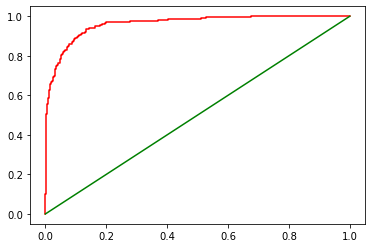

In [147]:
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'g')
plt.show()